In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('/content/Crop_recommendation.csv')

In [3]:
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

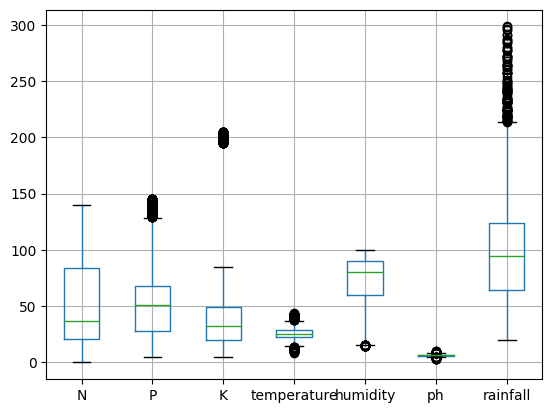

In [7]:
df.boxplot()

<Axes: ylabel='P'>

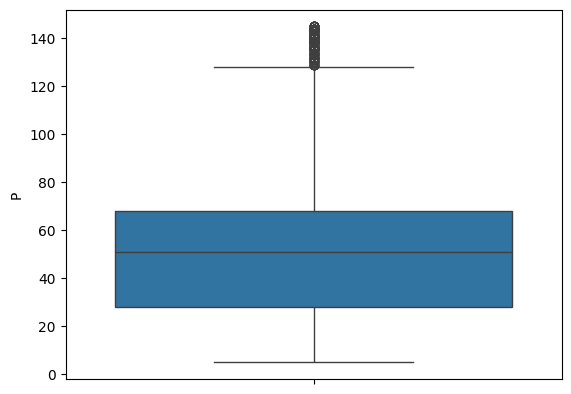

In [9]:
sns.boxplot(df['P'])

In [ ]:
# ENCODING

In [10]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df.label.nunique()

22

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['label']=le.fit_transform(df['label'])

In [14]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [16]:
print(df['label'])

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64


In [ ]:
SCALING

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [18]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [20]:
x= df.drop('label',axis=1)
y=df['label']

In [21]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [22]:
newx = minmax.fit_transform(x)

In [23]:
type(newx)

numpy.ndarray

In [24]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [25]:
x = pd.DataFrame(newx,columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

In [26]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231


In [27]:
df = pd.concat([x,y],axis=1)

In [28]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20
...,...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064,5
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972,5
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071,5
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280,5


In [ ]:
# logistic regression

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20


In [30]:
x = df.drop('label',axis=1)
x1 = pd.DataFrame(x)
y = df['label']
y1 = pd.DataFrame(y)

In [31]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
model = lr.fit(x1_train,y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y1_pred = model.predict(x1_test)

In [35]:
print(y1_pred)

[15 21 17 17  0 12  0 13 14 10  2  4 19  8  4 19  0 11 20 15  5 17 16 17
  3  8 14 16 18 20 19 13 20 10  8  2  8  3  3  9 20 12  2 11 14 11 18  4
 15 11  2  5  7 14  5  9  6  0  1 10 21  4 10 16 14  2 16 20 15 18 15  4
 20  1  2 17  1  6 21 16  5  3  8 13 16 12  5 13  2 19 11 13  6 17 18 12
  9  5  2 10  4 20 16 15 21  9 21  1 18 12  1 20  6 19 18  3 11  4 19 20
 18  7  2  4  3  2  4 11  1 13  1  9 19  3  4 16 18  1  1  0  9 15 14 13
  4  6  0  4  9 12 14 10 21 14 18 10 18  9 11  8  3  0 16  6 20  4  7 10
 21  7  7  2 19  3  4 11 10  7 21  8  5  5  9  8 12  9  1  9  4 17 17 14
 12 19 21  9 11  0  2  3  7  7  1  6 20 19 14  1 20 14 11  3  3  3  0 20
  9 14  5  2  9 12 12  4 17  0  3 19  3 15  0 15 15 12 12  6  4 19 20 15
  5 17 10 11 12 15  2 14  5  7  4  6 18 20  0 19  5  3  6  8 12  1 17  0
  3 20 18 13 14 20 19  7 13  8 11  4 11  3  1  8  4  5 12 15  0  1 18  2
 16  3 21  1  0  3  5 18 16  0  4 17 21 12 20  3 19  3 14 10  0 19  3 12
  3 19 21  9 14 15 21  9 15 12  8  2  3  1 10 18 17

In [36]:
from sklearn.metrics import accuracy_score
print("the accuracy score is:",accuracy_score(y1_test,y1_pred))

the accuracy score is: 0.9204545454545454


In [37]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231


In [38]:
model.predict([[0.528571	,0.214286	,0.175	,0.506901	,0.768751	,0.540508	,0.799905]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([20])

In [39]:
x.tail()

,N,P,K,temperature,humidity,ph,rainfall
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280
2199,0.742857,0.092857,0.125,0.424029,0.538222,0.509317,0.433721


In [41]:
model.predict([[0.842857	,0.200000	,0.125	,0.439202	,0.617880	,0.444433	,0.550071]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([5])